In [31]:
import cv2
from sklearn.cluster import KMeans
import webcolors
import glob
import numpy as np
import matplotlib.pyplot as plt

In [32]:
image = cv2.imread("image.jpg")

In [33]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [34]:
image = image.reshape(image.shape[0] * image.shape[1], image.shape[2])

In [35]:
image.shape

(618928, 3)

In [36]:
K = 4

In [37]:
clf = KMeans(n_clusters=K)

In [38]:
clf.fit(image)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [39]:
label = [0, 0, 0, 0]

In [40]:
for x in clf.labels_:
    label[x] += 1

In [41]:
label_sum = image.shape[0]
label = [float(x) / label_sum for x in label]

In [42]:
colors = [[int(value) for value in row] for row in clf.cluster_centers_]

In [43]:
clr = [webcolors.rgb_to_hex(c) for c in colors]

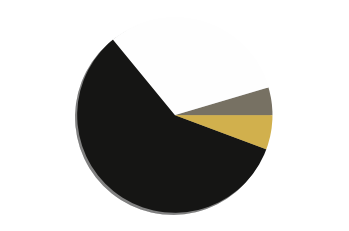

In [44]:
plt.pie(label, colors=clr, shadow=True) 
plt.axis('equal')
plt.show()

images shape: (10, 640, 480, 3)


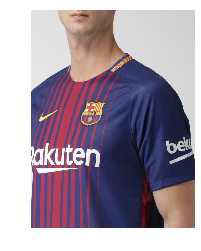

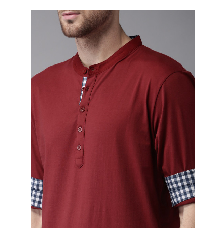

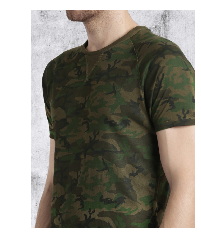

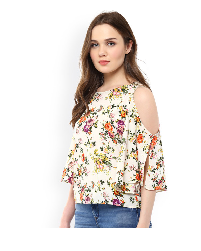

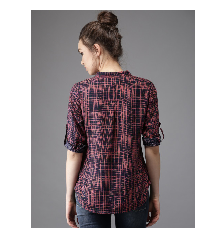

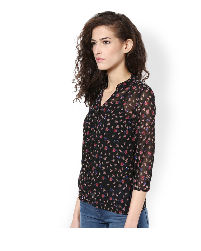

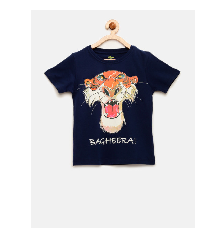

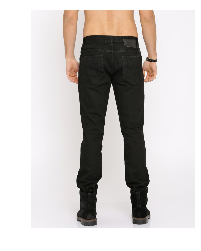

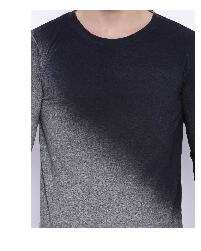

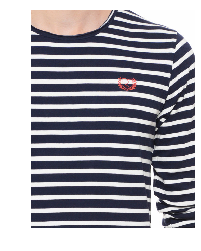

In [45]:
images = []
files = glob.glob ("C:/Users/GAURAV/Desktop/Acadview-PA/Logistic Regression vs Random Forest/Most Dominant Color/Dominant_Color_Data_Set/*.jpg")
for myFile in files:
    image = cv2.imread (myFile)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    images.append (image)
    plt.figure()
    plt.axis("off")
    plt.imshow(image)

print('images shape:', np.array(images).shape)

In [46]:
max_ = []
rgb_ = []
label = [0,0,0,0]
for i in range(len(images)):
    images[i] = images[i].reshape(images[i].shape[0] * images[i].shape[1], images[i].shape[2])
    clf = KMeans(n_clusters=K)
    clf.fit(images[i])
    for x in clf.labels_:
        label[x] += 1
    label_sum = images[i].shape[0]
    label = [float(x) / label_sum for x in label]
    m = max(label)
    ind = label.index(max(label))
    m = m*100
    max_.append(m)
    colors = [[int(value) for value in row] for row in clf.cluster_centers_]
    rgb_.append(colors[ind])

In [47]:
import matplotlib as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [48]:
print(max_)
print(rgb_)

[29.576497395833336, 41.90504419432746, 48.39265334683249, 67.02513019712136, 61.07424678616162, 58.45866889969293, 70.9724131166784, 46.36335701844562, 53.513822797386126, 56.55214191128375]
[[217, 212, 209], [137, 49, 55], [43, 44, 31], [252, 250, 248], [136, 130, 133], [251, 251, 251], [240, 240, 239], [241, 239, 241], [38, 37, 47], [42, 43, 62]]


In [49]:
def closest_colour(requested_colour):
    min_colours = {}
    for key, name in webcolors.css3_hex_to_names.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(key)
        rd = (r_c - requested_colour[0]) ** 2
        gd = (g_c - requested_colour[1]) ** 2
        bd = (b_c - requested_colour[2]) ** 2
        min_colours[(rd + gd + bd)] = name
    return min_colours[min(min_colours.keys())]

def get_colour_name(requested_colour):
    try:
        closest_name = actual_name = webcolors.rgb_to_name(requested_colour)
    except ValueError:
        closest_name = closest_colour(requested_colour)
        actual_name = None
    return actual_name, closest_name

#requested_colour = (119, 172, 152)
color_name = []
for i in rgb_:
    actual_name, closest_name = get_colour_name(i)
    print("Actual colour name:", actual_name, ", closest colour name:", closest_name)
    color_name.append(closest_name)

Actual colour name: None , closest colour name: lightgrey
Actual colour name: None , closest colour name: brown
Actual colour name: None , closest colour name: darkslategrey
Actual colour name: None , closest colour name: snow
Actual colour name: None , closest colour name: grey
Actual colour name: None , closest colour name: snow
Actual colour name: None , closest colour name: whitesmoke
Actual colour name: None , closest colour name: whitesmoke
Actual colour name: None , closest colour name: darkslategrey
Actual colour name: None , closest colour name: darkslategrey


In [50]:
color_name 

['lightgrey',
 'brown',
 'darkslategrey',
 'snow',
 'grey',
 'snow',
 'whitesmoke',
 'whitesmoke',
 'darkslategrey',
 'darkslategrey']

In [51]:
max_

[29.576497395833336,
 41.90504419432746,
 48.39265334683249,
 67.02513019712136,
 61.07424678616162,
 58.45866889969293,
 70.9724131166784,
 46.36335701844562,
 53.513822797386126,
 56.55214191128375]

In [52]:
list_tu = list(zip(color_name,max_))
list_ = [list(x) for x in list_tu]

In [53]:
list_

[['lightgrey', 29.576497395833336],
 ['brown', 41.90504419432746],
 ['darkslategrey', 48.39265334683249],
 ['snow', 67.02513019712136],
 ['grey', 61.07424678616162],
 ['snow', 58.45866889969293],
 ['whitesmoke', 70.9724131166784],
 ['whitesmoke', 46.36335701844562],
 ['darkslategrey', 53.513822797386126],
 ['darkslategrey', 56.55214191128375]]

In [54]:
m = 0;
avg_p = []
col = []
for i in list_:
    c = 0
    avg = 0
    l = i[0]
    if l not in col:
        for j in list_:
            if(l==j[0]):
                avg += j[1]
                c += 1
        m = avg/c
        print(m)
        avg_p.append(m)
        col.append(l)
    
print(col) 

29.576497395833336
41.90504419432746
52.81953935183412
62.74189954840715
61.07424678616162
58.66788506756201
['lightgrey', 'brown', 'darkslategrey', 'snow', 'grey', 'whitesmoke']


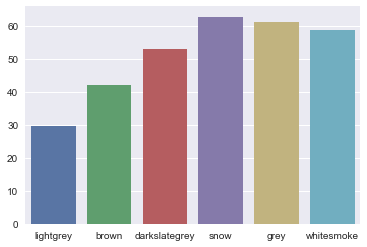

In [55]:
sns.barplot(col, avg_p)